In [66]:
# Import data from drive
import pandas as pd
Data = pd.read_csv('/content/drive/MyDrive/fake-news/train.csv')
Data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [67]:
# Checking for any null records
Data[Data.isnull().any(axis=1)]

,id,title,author,text,label
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
20,20,News: Hope For The GOP: A Nude Paul Ryan Has J...,NaN,Email \nSince Donald Trump entered the electio...,1
23,23,Massachusetts Cop’s Wife Busted for Pinning Fa...,NaN,Massachusetts Cop’s Wife Busted for Pinning Fa...,1
31,31,Israel is Becoming Pivotal to China’s Mid-East...,NaN,Country: Israel While China is silently playin...,1
...,...,...,...,...,...
20745,20745,Thomas Frank Explores Whether Hillary Clinton ...,NaN,Thomas Frank Explores Whether Hillary Clinton ...,1
20768,20768,Osama bin Laden’s older brother rents out luxu...,NaN,Osama bin Laden’s older brother rents out luxu...,1
20771,20771,NaN,Letsbereal,DYN's Statement on Last Week's Botnet Attack h...,1
20772,20772,NaN,beersession,Kinda reminds me of when Carter gave away the ...,1


In [68]:
#Removing null records
Data = Data.dropna()
Data.shape               # around 700 records are removed due to its null content

(18285, 5)

In [69]:
# Reset the data to regulate its index stack 
Data.reset_index(inplace=True)
Data.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [70]:
# Get the dependent and independent features
Independent = Data.drop('label', axis=1)
Dependent = Data['label']
Dependent.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [71]:
#Import the dependencies
from keras.layers import Embedding                                   # embedding layer
from keras.preprocessing.sequence import pad_sequences               # pre-pad
from keras.models import Sequential
from keras.preprocessing.text import one_hot                         # one hot representation
from keras.layers import LSTM                                        # LSTM layer
from keras.layers import Dense

In [72]:
# Frame one hot representation for "News Titles" present at Data. Title predominently deals with sentiment about the news.
News_Titles = Independent['title']
News_Titles


0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
18280    Rapper T.I.: Trump a ’Poster Child For White S...
18281    N.F.L. Playoffs: Schedule, Matchups and Odds -...
18282    Macy’s Is Said to Receive Takeover Approach by...
18283    NATO, Russia To Hold Parallel Exercises In Bal...
18284                            What Keeps the F-35 Alive
Name: title, Length: 18285, dtype: object

In [73]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [74]:
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
Lemmatizer = WordNetLemmatizer()
corpus = []                                                                    # Reservoir to store lemmatized words of News_Titles
for i in range(0, len(News_Titles)):
    review = re.sub('[^a-zA-Z]', ' ', News_Titles[i])
    review = review.lower()
    review = review.split()
    
    review = [Lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [75]:
corpus 

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [76]:
voc_size = 5000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[704, 678, 1911, 1909, 1668, 2035, 4790, 607, 2502, 3624],
 [3263, 3480, 3040, 3177, 409, 2454, 942],
 [3533, 4271, 3830, 4057],
 [3120, 726, 3321, 2514, 4607, 3598],
 [538, 409, 1540, 128, 774, 4548, 409, 4530, 2258, 2519],
 [705,
  2878,
  704,
  4730,
  2598,
  2717,
  4268,
  4269,
  4830,
  3505,
  2708,
  3857,
  3513,
  236,
  942],
 [1317, 476, 4748, 2925, 255, 4915, 610, 2771, 4216, 496, 4354],
 [16, 2263, 4624, 3179, 1146, 935, 2717, 2413, 4216, 496, 4354],
 [3923, 4097, 4786, 2299, 4929, 1712, 3651, 270, 2717, 3401],
 [2258, 2934, 2136, 2492, 3383, 3335, 2822, 1514],
 [2202, 2370, 2154, 507, 4783, 525, 2779, 832, 709, 2724, 3132],
 [2514, 4853, 1668, 4660, 2717, 1146],
 [3372, 1176, 2985, 4081, 3712, 2679, 2993, 3151, 4441],
 [3191, 2839, 2418, 4779, 3589, 1944, 4816, 4216, 496, 4354],
 [4262, 2381, 2073, 3106, 1277, 4216, 496, 4354],
 [2326, 4593, 2994, 4947, 4652, 4833, 3368, 1613, 391, 1723],
 [2194, 1355, 3480],
 [3410, 1387, 4531, 907, 2717, 975, 1918, 942],
 [728, 993

In [77]:
# Manifest Embedding document:
sent_length=16
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)                                                         # shape (18285, 16)

[[   0    0    0 ...  607 2502 3624]
 [   0    0    0 ...  409 2454  942]
 [   0    0    0 ... 4271 3830 4057]
 ...
 [   0    0    0 ... 4216  496 4354]
 [   0    0    0 ... 1376 3710 1836]
 [   0    0    0 ... 3787 4382 4606]]


In [78]:
#Creating LSTM-RNN model
embedding_vector_features=100                                                               # features 
model=Sequential()                                                                          # Sequential model
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))           #Embedding layer due to word embedding techniques adopted # input layer
model.add(LSTM(100))                                                                        # LSTM(neurons=100)
model.add(Dense(1,activation='sigmoid'))                                                    #output layer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])             # compile the model
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 16, 100)           500000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 580,501
Trainable params: 580,501
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
# Train_test_split (As usual)
import numpy as np
X = np.array(embedded_docs)
y = np.array(Dependent)
print(X.shape,y.shape)

(18285, 16) (18285,)


In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [81]:
# Train the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 9s 36ms/step - loss: 0.4341 - accuracy: 0.8087 - val_loss: 0.1922 - val_accuracy: 0.9213
Epoch 2/10
192/192 [==============================] - 6s 33ms/step - loss: 0.1155 - accuracy: 0.9537 - val_loss: 0.1965 - val_accuracy: 0.9185
Epoch 3/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0706 - accuracy: 0.9769 - val_loss: 0.2150 - val_accuracy: 0.9143
Epoch 4/10
192/192 [==============================] - 6s 33ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.3133 - val_accuracy: 0.9186
Epoch 5/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.3645 - val_accuracy: 0.9167
Epoch 6/10
192/192 [==============================] - 6s 33ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.4649 - val_accuracy: 0.9067
Epoch 7/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.4696 - val_accuracy: 0.9100

In [82]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


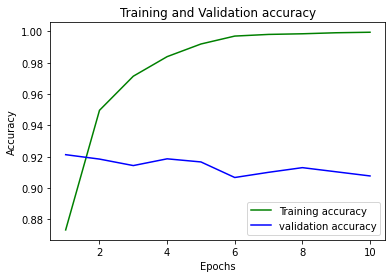

In [96]:
# Diagnose curve plot : 1 : Accuracy Vs Validation Accuracy
loss_train = model.history.history['accuracy']
loss_val = model.history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

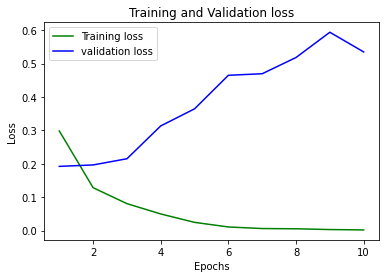

In [98]:
# Diagnose curve plot :2 : loss Vs Validation loss
loss_train = model.history.history['loss']
loss_val = model.history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [100]:
# Hyperparameter tuning:Adding Droput layer in the model: and reduce the features
from keras.layers import Dropout
embedding_vector_features=40
model_hp=Sequential()
model_hp.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model_hp.add(Dropout(0.3))                                                                  # Dropout layers
model_hp.add(LSTM(100))
model_hp.add(Dropout(0.3))                                                                  # Dropout layers
model_hp.add(Dense(1,activation='sigmoid'))
model_hp.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_hp.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 16, 40)            200000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 40)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [101]:
model_hp.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 8s 29ms/step - loss: 0.4890 - accuracy: 0.7420 - val_loss: 0.1981 - val_accuracy: 0.9181
Epoch 2/10
192/192 [==============================] - 5s 27ms/step - loss: 0.1440 - accuracy: 0.9422 - val_loss: 0.1922 - val_accuracy: 0.9218
Epoch 3/10
192/192 [==============================] - 5s 27ms/step - loss: 0.0973 - accuracy: 0.9664 - val_loss: 0.2212 - val_accuracy: 0.9215
Epoch 4/10
192/192 [==============================] - 5s 27ms/step - loss: 0.0688 - accuracy: 0.9756 - val_loss: 0.2374 - val_accuracy: 0.9158
Epoch 5/10
192/192 [==============================] - 5s 27ms/step - loss: 0.0568 - accuracy: 0.9813 - val_loss: 0.3188 - val_accuracy: 0.9153
Epoch 6/10
192/192 [==============================] - 5s 27ms/step - loss: 0.0410 - accuracy: 0.9879 - val_loss: 0.3458 - val_accuracy: 0.9092
Epoch 7/10
192/192 [==============================] - 5s 27ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.3821 - val_accuracy: 0.9137

In [102]:
print(model_hp.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


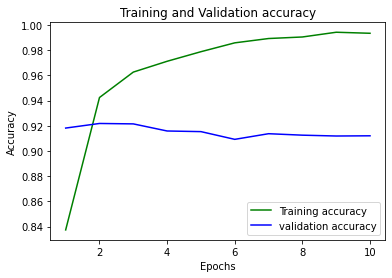

In [103]:
# Diagnose curve plot : 1 : Accuracy Vs Validation Accuracy
loss_train = model_hp.history.history['accuracy']
loss_val = model_hp.history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

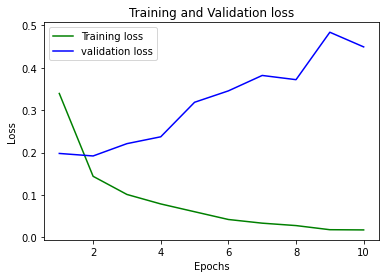

In [104]:
# Diagnose curve plot :2 : loss Vs Validation loss
loss_train = model_hp.history.history['loss']
loss_val = model_hp.history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [109]:
# model_hp after the training showing some sort of improvement towards generalized model but still neeeds to be trained.
# Evaluating performance metrics:
y_pred= (model_hp.predict(X_test) > 0.5).astype("int32")                        
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

[[3108  311]
 [ 220 2396]]
0.912013256006628
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3419
           1       0.89      0.92      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035

